In [1]:
pip install gradio

Note: you may need to restart the kernel to use updated packages.


In [2]:
#|export
from fastai.vision.all import *
import gradio as gr

def is_cat(x): return x[0].isupper()

C:\Users\yashm\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\detection\anchor_utils.py:63: UserWarning: Failed to initialize NumPy: module compiled against API version 0x10 but this version of numpy is 0xf (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:68.)
  device: torch.device = torch.device("cpu"),


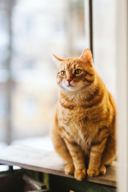

In [3]:
#|export
im = PILImage.create('Cat_2.jpg')  
im.thumbnail((192,192))
im

In [13]:
#|export
learn = load_learner('model_1.pkl')


NotImplementedError: cannot instantiate 'PosixPath' on your system

In [14]:
learn.predict(im)

NameError: name 'learn' is not defined

In [ ]:
#|export
categories = ('Dog', 'Cat')

def classify_image(img):
    pred, idx, probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))


In [ ]:
#|export
classify_image(im)

In [ ]:
#|export
image = gr.inputs.Image(shape = (192,192))
label= gr.outputs.Label()
examples = ['Dog_1.jpg', 'Dog_2.jpg', 'Dog_3.jpg', 'Cat_1.jpg', 'Cat_2.jpg', 'Cat_3.jpg', 'Mixed_1.jpg', 'Mixed_2.jpg', 'Mixed_3.jpg']

intf = gr.interface(fn= classify_image, inputs = image, outputs = label , examples = examples)
intf.launch(inline = False)

In [ ]:
m = learn.model